In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [6]:
img = cv.imread('/content/periodic_noise.JPG', cv.IMREAD_GRAYSCALE)

In [7]:
# 1. Высокочастотная фильтрация Гаусса
kernel = cv.getGaussianKernel(15, 3)
kernel_2d = kernel * kernel.T
low_pass = cv.filter2D(img, -1, kernel_2d)
high_pass = img - low_pass

In [8]:
# 2. Удаление периодического шума
dft = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

rows, cols = img.shape
cx, cy = rows//2, cols//2
mask = np.ones((rows, cols, 2), np.uint8)
mask[cx-2:cx+2, :, :] = 0
mask[:, cy-2:cy+2, :] = 0

dft_filtered = dft_shift * mask
f_ishift = np.fft.ifftshift(dft_filtered)
img_back = cv.idft(f_ishift)
img_filtered = cv.magnitude(img_back[:,:,0], img_back[:,:,1])

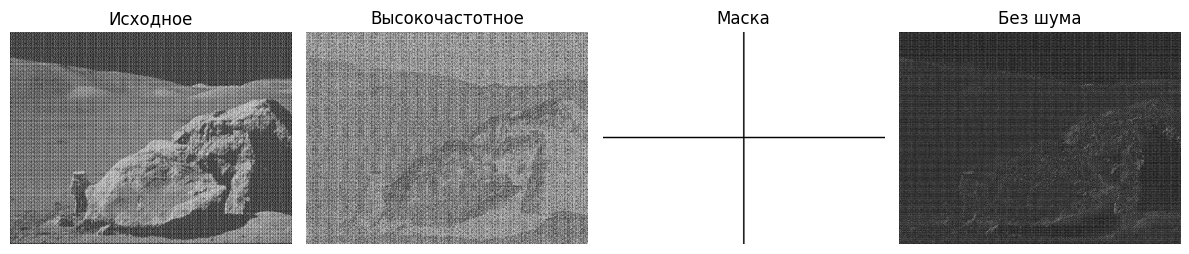

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap='gray')
plt.title('Исходное')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(high_pass, cmap='gray')
plt.title('Высокочастотное')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(mask[:,:,0], cmap='gray')
plt.title('Маска')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_filtered, cmap='gray')
plt.title('Без шума')
plt.axis('off')

plt.tight_layout()
plt.show()